In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

In [52]:
## EDA --------
# **Read the data dictionary.**
# Determine _what_ missing values mean.
# Figure out what each categorical value represents.
# Identify outliers.
# Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [53]:
train = pd.read_csv('C:/Users/james/Documents/GA/Projects/project-2/datasets/train.csv')

In [54]:
train.shape

(2051, 81)

In [55]:
# DROP rows where column is empty
# 'Garage Area'
# 'Garage Cars'
# 'Total Bsmt SF'
train.dropna(subset=['Garage Area'], inplace=True)
train.dropna(subset=['Garage Cars'], inplace=True)
train.dropna(subset=['Total Bsmt SF'], inplace=True)

In [56]:
#function that removes outliers in all columns with a threshold higher than 3
def z_score_col(df, columns):
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers = df[np.abs(z_scores) > 3]
        cleaned_df = df.drop(outliers.index)
    return cleaned_df

In [57]:
xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces',]

In [58]:
no_outlier_train = z_score_col(train, xvars)

In [59]:
no_outlier_train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [60]:
no_outlier_train.shape

(2042, 81)

In [61]:
train.shape

(2049, 81)

In [62]:
# makes Jupyter show all rows and columns for better visibility
pd.options.display.max_rows = train.shape[1]
pd.options.display.max_columns = train.shape[1]
pd.set_option('display.max_columns', 300)

In [63]:
# All missing values from highest to lowest
train.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2040
Misc Feature      1984
Alley             1909
Fence             1651
Mas Vnr Type      1238
Fireplace Qu       998
Lot Frontage       330
Garage Finish      113
Garage Type        113
Garage Yr Blt      113
Garage Qual        113
Garage Cond        113
Bsmt Exposure       57
BsmtFin Type 2      55
BsmtFin Type 1      54
Bsmt Cond           54
Bsmt Qual           54
Mas Vnr Area        22
Bsmt Half Bath       1
Bsmt Full Bath       1
Functional           0
Kitchen Qual         0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
TotRms AbvGrd        0
Full Bath            0
dtype: int64

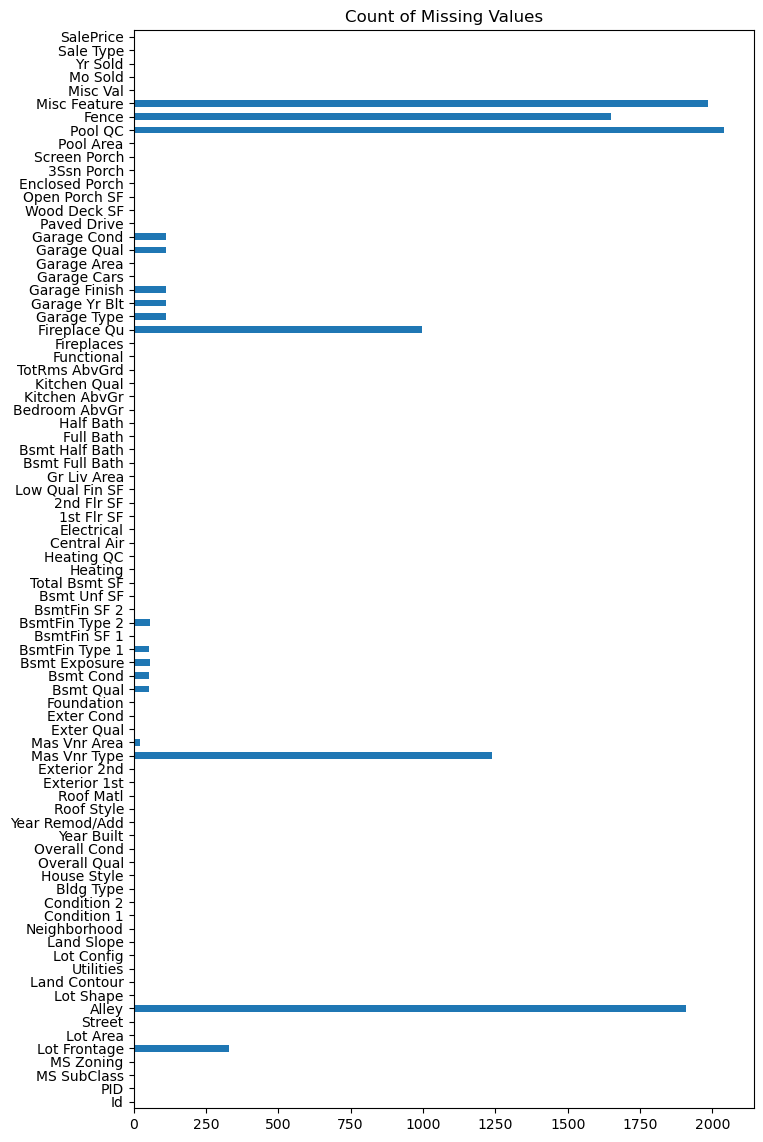

In [64]:
# GRAPH: Missing values in each column
train.isnull().sum().plot(kind='barh', figsize=(8,14))
plt.title('Count of Missing Values');

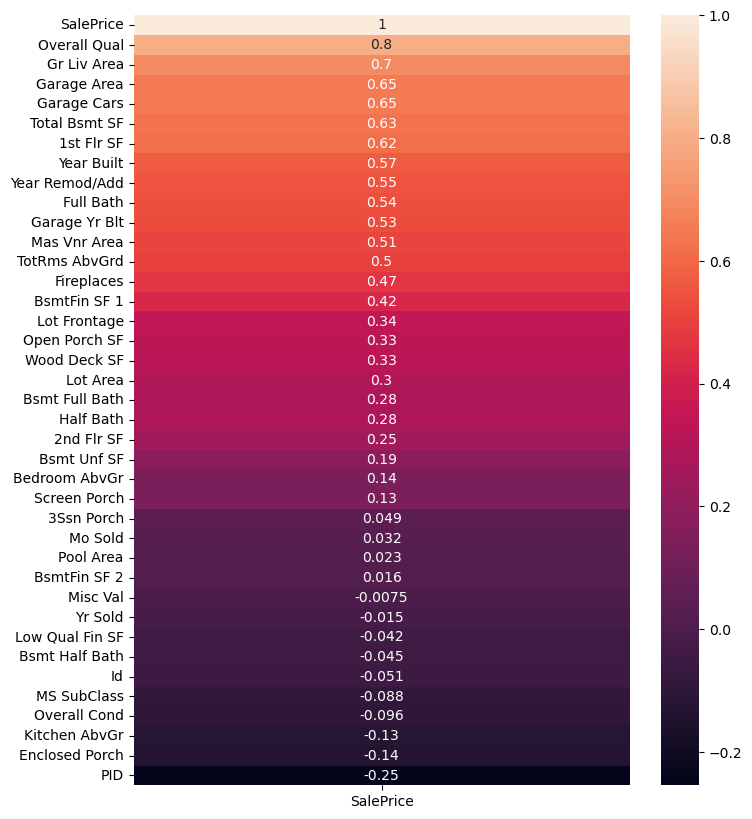

In [65]:
# shows the highest corellating variables for a single variable model // try top 10? and then retest with more or less variables // dont use both Garage area & Garage Cars??
plt.figure(figsize=(8,10))
sns.heatmap(train.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending = False), annot=True);

In [66]:
# removed 'Wood Deck SF' and outliers based on Z-score of threshhold: 3
xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces',]
X = no_outlier_train[xvars]
y = no_outlier_train['SalePrice']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
model.score(X_train, y_train)

0.8162608726043099

In [91]:
X.head()

,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,Fireplaces
0,6,1479,475.0,2.0,725.0,1976,2005,2,0
1,7,2122,559.0,2.0,913.0,1996,1997,2,1
2,5,1057,246.0,1.0,1057.0,1953,2007,1,0
3,5,1444,400.0,2.0,384.0,2006,2007,2,0
4,6,1445,484.0,2.0,676.0,1900,1993,2,0


In [70]:
model.score(X_test, y_test)

0.8212632548229255

In [71]:
model.coef_

array([16984.80526483,    55.98176482,    57.18858965, -3376.5528578 ,
          33.22201632,   307.2874066 ,   355.32776076, -8380.94813296,
       10214.24129412])

In [72]:
model.intercept_

-1365566.7366699085

In [73]:
y_pred = model.predict(X)

In [74]:
y_pred.shape

(2042,)

In [75]:
# R2
metrics.r2_score(y, y_pred)

0.8174929437043695

In [76]:
# MSE: - Need to fix outliers
mse = metrics.mean_squared_error(y, y_pred)
mse

1144842322.0020487

In [93]:
# RMSE:
np.sqrt(mse)

33835.51864538282

In [78]:
# LINEM ASSUMPTIONS

In [79]:
# L X and y must be the same size?????
# plt.scatter(X, y);

In [80]:
# I

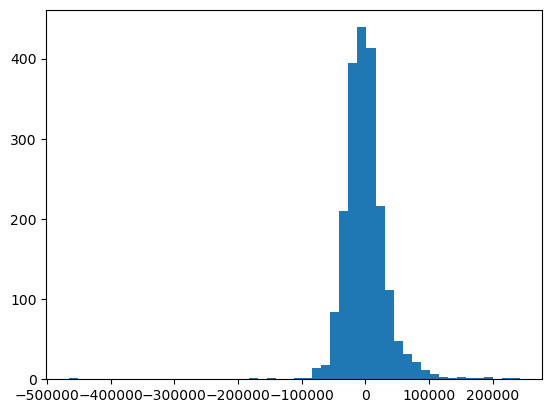

In [81]:
# N
resids = y - y_pred
plt.hist(resids, bins=50);

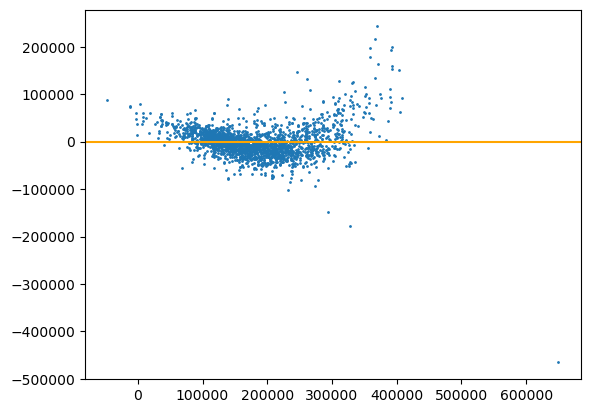

In [82]:
# E
plt.scatter(y_pred, resids, s=1)
plt.axhline(0, color="orange");

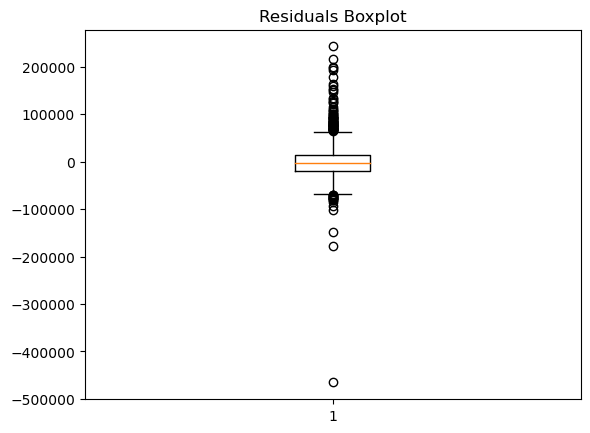

In [83]:
plt.boxplot(resids)
plt.title('Residuals Boxplot')
plt.show()

### SUBMISSION # 2

In [84]:
test = pd.read_csv('C:/Users/james/Documents/GA/Projects/project-2/datasets/test.csv')

In [85]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [86]:
y_pred_submission = model.predict(test[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces']])

In [87]:
test['SalePrice'] = y_pred_submission

In [88]:
james_submission = test[['Id', 'SalePrice']]

In [89]:
james_submission.set_index('Id', inplace=True)

In [90]:
# james_submission.to_csv('C:/Users/james/Documents/GA/Projects/project-2/data/james_submission_2.csv')